Project Members:                                                  
- Daniel Arday
- Kevin Akman
- Albert Chen

Date:  10/23/2023


# Introduction

The UCI Computer Hardward dataset (https://archive.ics.uci.edu/dataset/29/computer+hardware) was created by Jacob Feldmesser to compare relative CPU Performance Data, described in terms of its cycle time, memory size, and other metrics for the paper "Attributes of the performance of central processing units: a relative performance prediction model" ( Ein-Dor & Feldmesser, 1987). In this article, the authors determined the estimated relative performance values utilizing a linear regression method. Refer to pages 308-313 of their publication for a detailed explanation of how the relative performance values were established (https://archive.ics.uci.edu/dataset/29/computer+hardware, 2023).


### Objective

**Our goal with analyzing this dataset is to create a linear regression model to estimate relative CPU performance values.**

### Data Description/Attribuite Information
   1. `Vendor Name`: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. `Model Name`: many unique symbols
   3. `MYCT`: machine cycle time in nanoseconds (integer)
   4. `MMIN`: minimum main memory in kilobytes (integer)
   5. `MMAX`: maximum main memory in kilobytes (integer)
   6. `CACH`: cache memory in kilobytes (integer)
   7. `CHMIN`: minimum channels in units (integer)
   8. `CHMAX`: maximum channels in units (integer)
   9. `PRP`: published relative performance (integer)
   10. `ERP`: estimated relative performance from the original article (integer)

### Loading libraries and  Understanding the data

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# to do mathematical computations
import math
# To build linear model for prediction
from sklearn.linear_model import LinearRegression
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('machine.csv', sep=',')
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 208 rows and 10 columns.


In [3]:
data.head(5)

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


#### Initial Observation: This csv does not include a row for the data lables, so we will need to add that in.

Let's add the necessary columns to the dataset

In [4]:
#Adding in the Attribute Information
data.attrs['info'] = {
    'Vendor Name': 'Text',
    'Model Name': 'Numeric',
    'MYCT': 'Numeric',
    'MMIN': 'Numeric',
    'CACH': 'Numeric',
    'CHMIN': 'Numeric',
    'CHMAX': 'Numeric',
    'CHMAX': 'Numeric',
    'PRP': 'Numeric',
    'ERP': 'Numeric'
}

In [5]:
# Attribute Information Row
attribute_info = ['Vendor Name','Model Name','MYCT','MMAX','MMIN','CACH','CHMIN','CHMAX','PRP','ERP']
data.columns = attribute_info
data.head(1)

,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [6]:
#Adding in the Attribute Information
data.attrs['info'] = {
    'Vendor Name': 'Text',
    'Model Name': 'Numeric',
    'MYCT': 'Numeric',
    'MMIN': 'Numeric',
    'CACH': 'Numeric',
    'CHMIN': 'Numeric',
    'CHMAX': 'Numeric',
    'CHMAX': 'Numeric',
    'PRP': 'Numeric',
    'ERP': 'Numeric'
}

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,208.0,204.201923,260.833016,17.0,50.0,110.0,225.0,1500.0
MMAX,208.0,2880.538462,3883.839300,64.0,768.0,2000.0,4000.0,32000.0
MMIN,208.0,11824.019231,11747.916663,64.0,4000.0,8000.0,16000.0,64000.0
CACH,208.0,24.096154,37.417999,0.0,0.0,8.0,32.0,256.0
CHMIN,208.0,4.644231,6.787198,0.0,1.0,2.0,6.0,52.0
CHMAX,208.0,17.740385,24.913375,0.0,5.0,8.0,24.0,176.0
PRP,208.0,105.177885,161.090223,6.0,27.0,49.5,111.5,1150.0
ERP,208.0,98.850962,154.974961,15.0,28.0,45.0,99.5,1238.0


Now that we've added the columns let's make a working copy, and see the statistics

In [8]:
df = data.copy()
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

There are 208 rows and 10 columns.


,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,208.0,204.201923,260.833016,17.0,50.0,110.0,225.0,1500.0
MMAX,208.0,2880.538462,3883.839300,64.0,768.0,2000.0,4000.0,32000.0
MMIN,208.0,11824.019231,11747.916663,64.0,4000.0,8000.0,16000.0,64000.0
CACH,208.0,24.096154,37.417999,0.0,0.0,8.0,32.0,256.0
CHMIN,208.0,4.644231,6.787198,0.0,1.0,2.0,6.0,52.0
CHMAX,208.0,17.740385,24.913375,0.0,5.0,8.0,24.0,176.0
PRP,208.0,105.177885,161.090223,6.0,27.0,49.5,111.5,1150.0
ERP,208.0,98.850962,154.974961,15.0,28.0,45.0,99.5,1238.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  208 non-null    object
 1   Model Name   208 non-null    object
 2   MYCT         208 non-null    int64 
 3   MMAX         208 non-null    int64 
 4   MMIN         208 non-null    int64 
 5   CACH         208 non-null    int64 
 6   CHMIN        208 non-null    int64 
 7   CHMAX        208 non-null    int64 
 8   PRP          208 non-null    int64 
 9   ERP          208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


# Data Cleaning & Preparation

### Dealing with Missing Values

In [11]:
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMAX           0
MMIN           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

No missing values, so no interpolation is needed.

#### This is our code for dropping outliers. Initially we trained our model on all the data, but later we optimized it by dropping some of the outliers.

This sections comes before EDA but was informed by it and is further discussed there and in later sections.

In [12]:
def drop_outliers(val):
    Q1 = df[val].quantile(0.25)
    Q3 = df[val].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the uppder bound via Q3 and IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[df[val] > upper_bound]

    # Drop outliers from the DataFrame
    df_clean = df.drop(outliers.index, inplace=False)
    
    return outliers, df_clean

#Ultimately we decide to use this function on MMIN and MYCT, explanation is given later in EDA

### Drop Outliers

Here we generate two different dataframes for the outliers in MYCT and outliers in MMIN.

In [13]:
val = 'MYCT'
outliers_MYCT, df_clean_MYCT = drop_outliers(val)
print(f"The number of outliers dropped is {outliers_MYCT[val].count()}")
print(f"The number of rows reamining is {df_clean_MYCT[val].count()}")
outliers_MYCT.head()

The number of outliers dropped is 20
The number of rows reamining is 188


,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
45,dec,microvax-1,810,512,512,8,1,1,18,18
46,dec,vax:11/730,810,1000,5000,0,1,1,20,28
49,dg,eclipse:c/350,700,384,8000,0,1,1,24,34
50,dg,eclipse:m/600,700,256,2000,0,1,1,24,19
56,formation,f4000/100,800,256,8000,0,1,4,12,34


In [14]:
val = 'MMIN'
outliers_MMIN, df_clean_MMIN = drop_outliers('MMIN')
print(f"The number of outliers dropped is {outliers_MMIN[val].count()}")
print(f"The number of rows reamining is {df_clean_MMIN[val].count()}")
outliers_MMIN.head()

The number of outliers dropped is 4
The number of rows reamining is 204


,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
7,amdahl,580-5860,23,16000,64000,64,16,32,636,749
8,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
197,sperry,1100/93,30,8000,64000,96,12,176,915,919
198,sperry,1100/94,30,8000,64000,128,12,176,1150,978


# Exploratory Data Analysis

Here are some useful Functions to be used for Data Analysis

In [15]:
'''
This function creates a bar plot for comparing categorical data
'''
def draw_a_barplot(input_data, target_feature):
    dataset_length = len(input_data[target_feature])  # length of the column
    unique_values_count = input_data[target_feature].nunique()
    plt.figure(figsize=(unique_values_count + 1, 7))
    plt.xticks(rotation=90, fontsize=15)
    bar_axis = sns.countplot(
        data=input_data,
        x=target_feature,
        palette="Paired",
        order=input_data[target_feature].value_counts().index.sort_values(),
    )

    for bar in bar_axis.patches:
        label = bar.get_height()
        position_x = bar.get_x() + bar.get_width() / 2  # width of the plot
        position_y = bar.get_height() # height of the plot
        bar_axis.annotate(
            label,
            (position_x, position_y),
            ha="center",
            va="center",
            size=18,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()
    
    

# This function creates a box plot and a histogram for comparing numerical data. It also displays the mean and median
def draw_boxplot_histogram(dataset, column):
    '''
    dataset: Pandas DataFrame
    column: Name of the DataFrame column to be plotted
    plot_size: Dimensions of the plot
    '''
    # Creating a subplot grid of 2 rows for boxplot and histogram
    figure, (axis_boxplot, axis_histogram) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Adjusting the ratio of boxplot to histogram height
        figsize=(10, 6),
    )
    
    # Creating a histogram with optional kernel density estimate and specified number of bins
    sns.histplot(data=dataset, x=column, ax=axis_histogram)
    
    # Adding lines to mark the mean and median values in the histogram
    axis_histogram.axvline(dataset[column].mean(), color="#228B22", linestyle="--", label='Mean')
    axis_histogram.axvline(dataset[column].median(), color="#301934", linestyle="-", label='Median')
    
    # Adding a legend to the histogram
    axis_histogram.legend()
    
    # Drawing a boxplot with a star marking the mean value
    sns.boxplot(data=dataset, x=column, ax=axis_boxplot, showmeans=True, color="#b4b2fd")
    
    # Displaying the plot
    plt.show()

## Univariate analysis

### Vendor Name

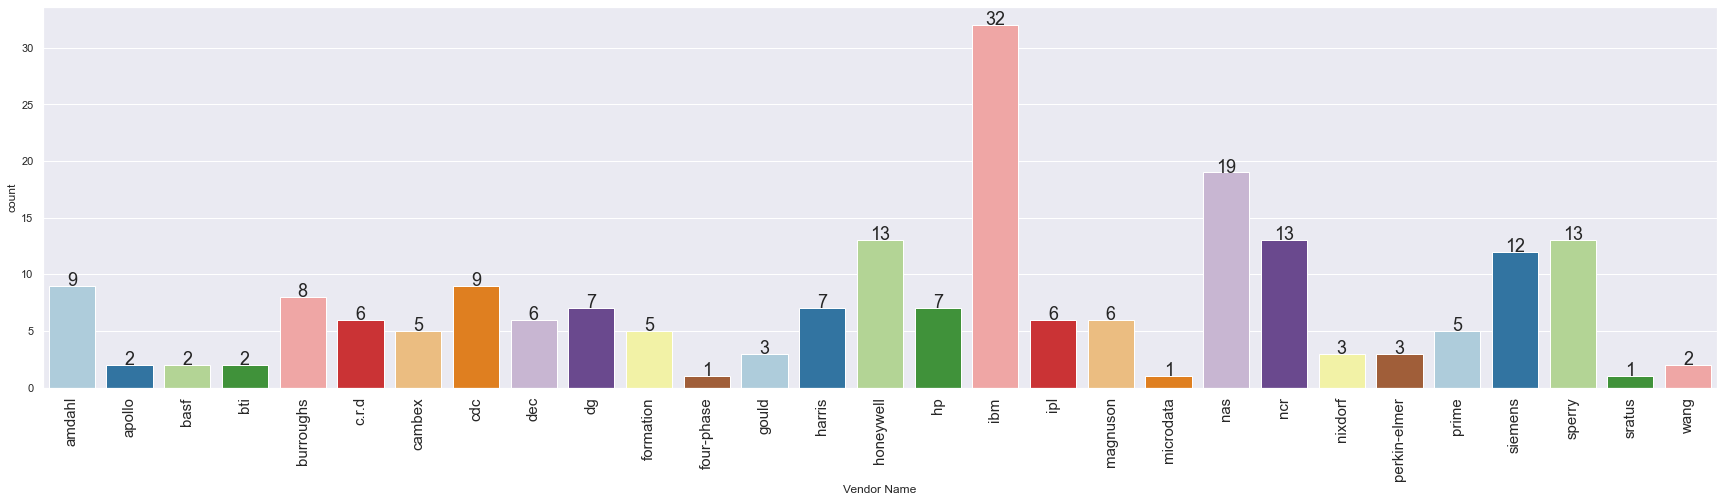

In [16]:
draw_a_barplot(df, "Vendor Name")

**Obsevations**

This dataset was created in 1987 and as such computing power, functionality, and market share were significantly different than what we can observe today. Here we see IBM taking the lead with 32 models aviable in this study followed by NAS coming in second with 19 models. The other manufacturers range between 1 to 13 models.

### Model Name

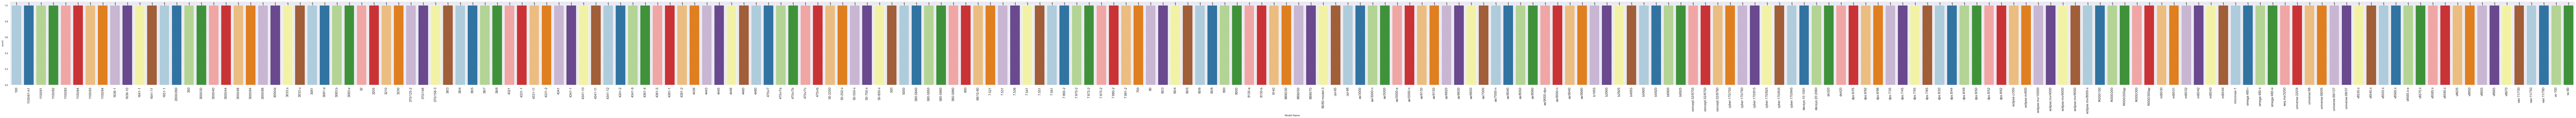

In [17]:
draw_a_barplot(df, "Model Name")

**Observations**

There is exactly one model name of each data entry, therefore this information is probably best dropped later on when trying to train our model. The model name acts like a primary key or row identifier when analyzing the overall dataset.

### MYCT

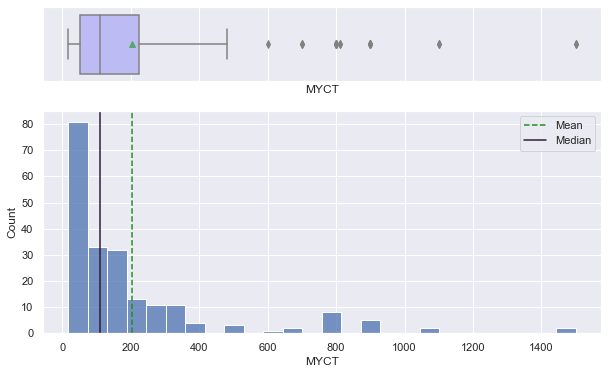

In [18]:
draw_boxplot_histogram(df, "MYCT")

#### Observations on MYCT
- Heavily skewed to the right
- Significant amount of outliers
- Mean is higher than the median

### MMAX

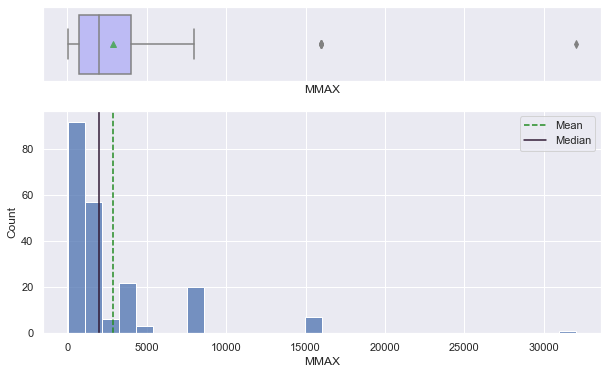

In [19]:
draw_boxplot_histogram(df, "MMAX")

#### Observations on MMAX
- Heavily skewed to the right
- Mean is higher than the median

### MMIN

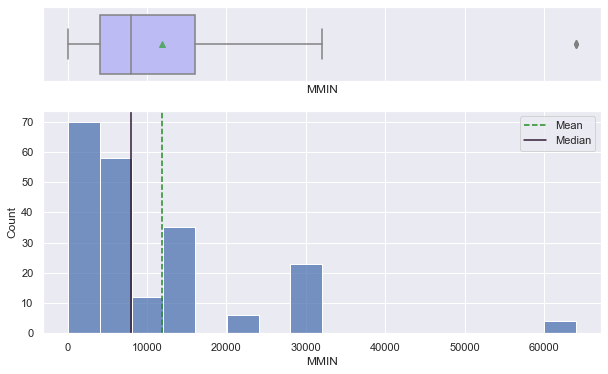

In [20]:
draw_boxplot_histogram(df, "MMIN")

#### Observations on MMIN
- Heavily skewed to the right
- Mean is higher than the median

### CACH

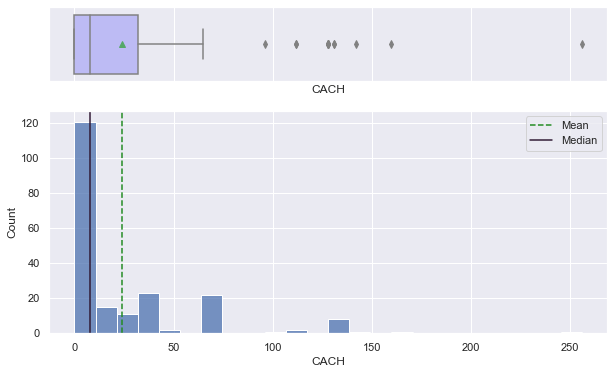

In [21]:
draw_boxplot_histogram(df, "CACH")

#### Observations on CACH
- Heavily skewed to the right
- Significant amount of outliers
- Mean is higher than the median

### CHMIN

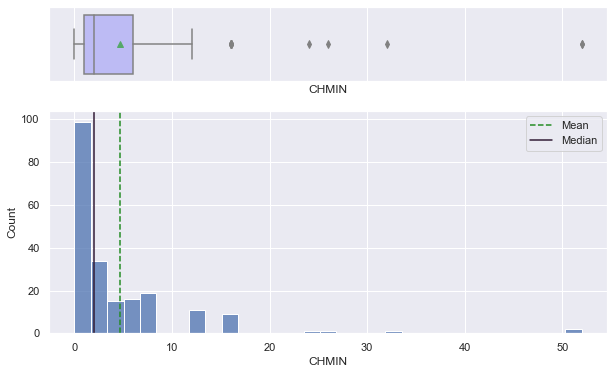

In [22]:
draw_boxplot_histogram(df, "CHMIN")

In [23]:
(df['CHMIN'].min(), df['CHMIN'].max())

(0, 52)

#### Observations on CHMIN
- Heavily skewed to the right
- Several outliers
- The lowest value is 0, the highest is 52
- Mean is higher than the median

### CHMAX

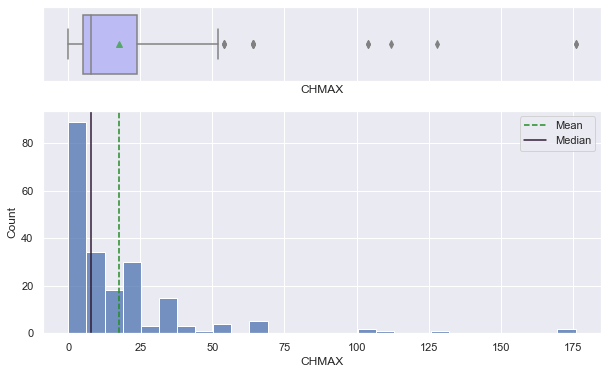

In [24]:
draw_boxplot_histogram(df, "CHMAX")

In [25]:
(df['CHMAX'].min(), df['CHMAX'].max())

(0, 176)

#### Observations on CHMAX
- Heavily skewed to the right
- Several outliers
- The lowest value is 0, the highest is 172
- Mean is higher than the median

### PRP

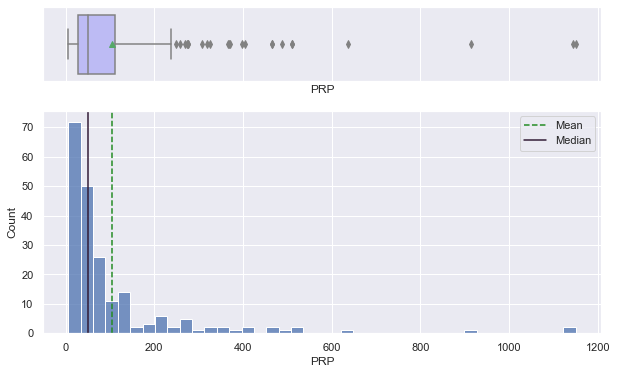

In [26]:
draw_boxplot_histogram(df, "PRP")

#### Observations on PRP
- Heavily skewed to the right
- Significant amount of outliers
- Mean is higher than the median

### ERP

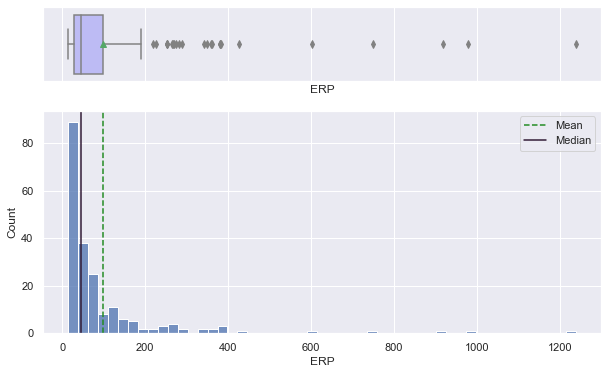

In [27]:
draw_boxplot_histogram(df, "ERP")

#### Observations on ERP
- Heavily skewed to the right
- Significant amount of outliers
- Mean is higher than the median

## Bivariate analysis

### Heat Map

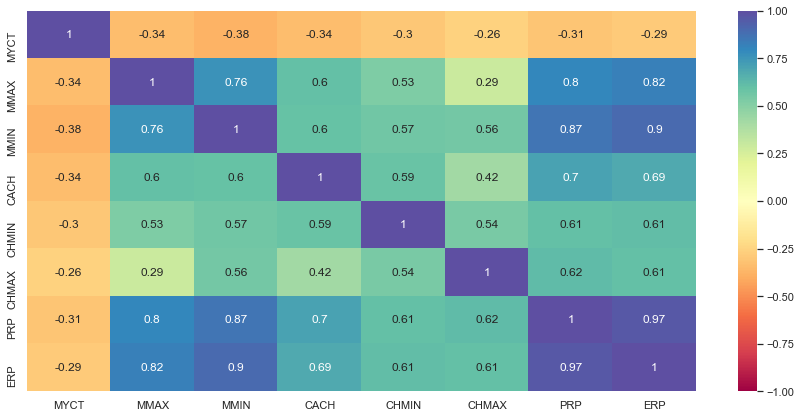

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

Here we see that MYCT has a negative correlation to all other variables. We can see most values show a strong correlation (+0.50) realtive to each other. `CHMAX` and `MMAX` are on the weaker side at 0.27 postitive correlation. `CHMAX` and `CACH` shows a moderate positive correlation of 0.42.

### Pairplot

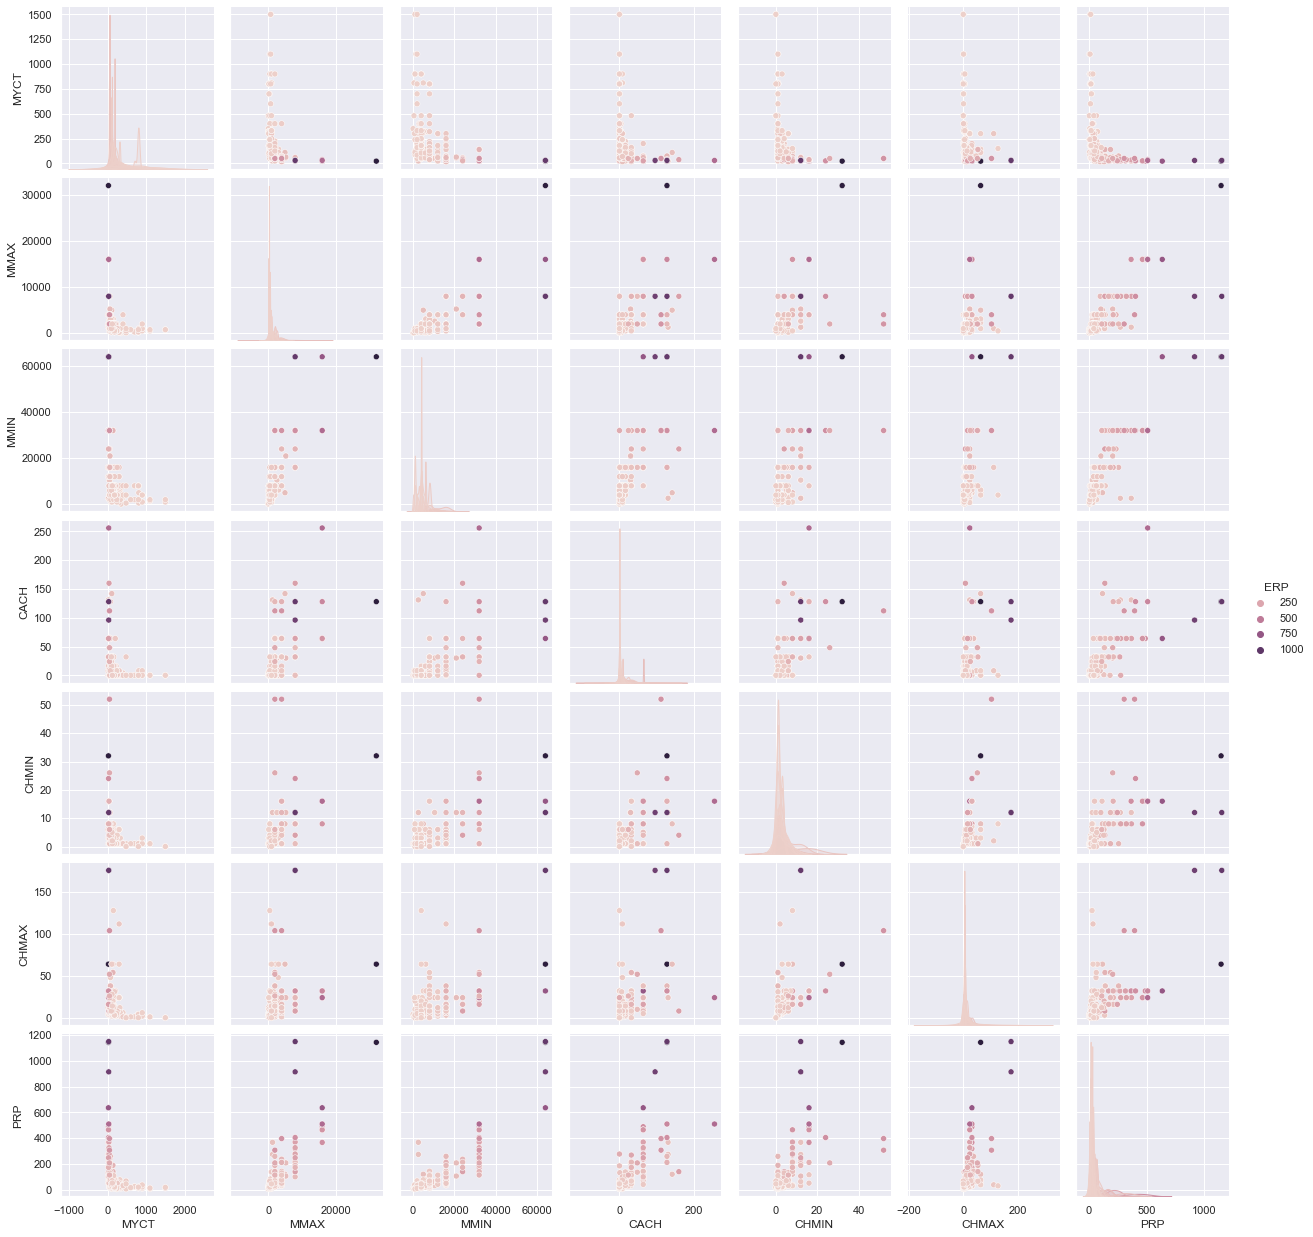

In [29]:
sns.pairplot(data=df,hue="ERP")
plt.show()

#### Analysis on Pairplot

The pairplot did not reveal anything additional to us that was not immediately available in our boxplots or heatmap but we included here as another additional visualzaiton of the data.

### Boxplots of Vendor Name vs Estimated Rate of Performance (ERP)

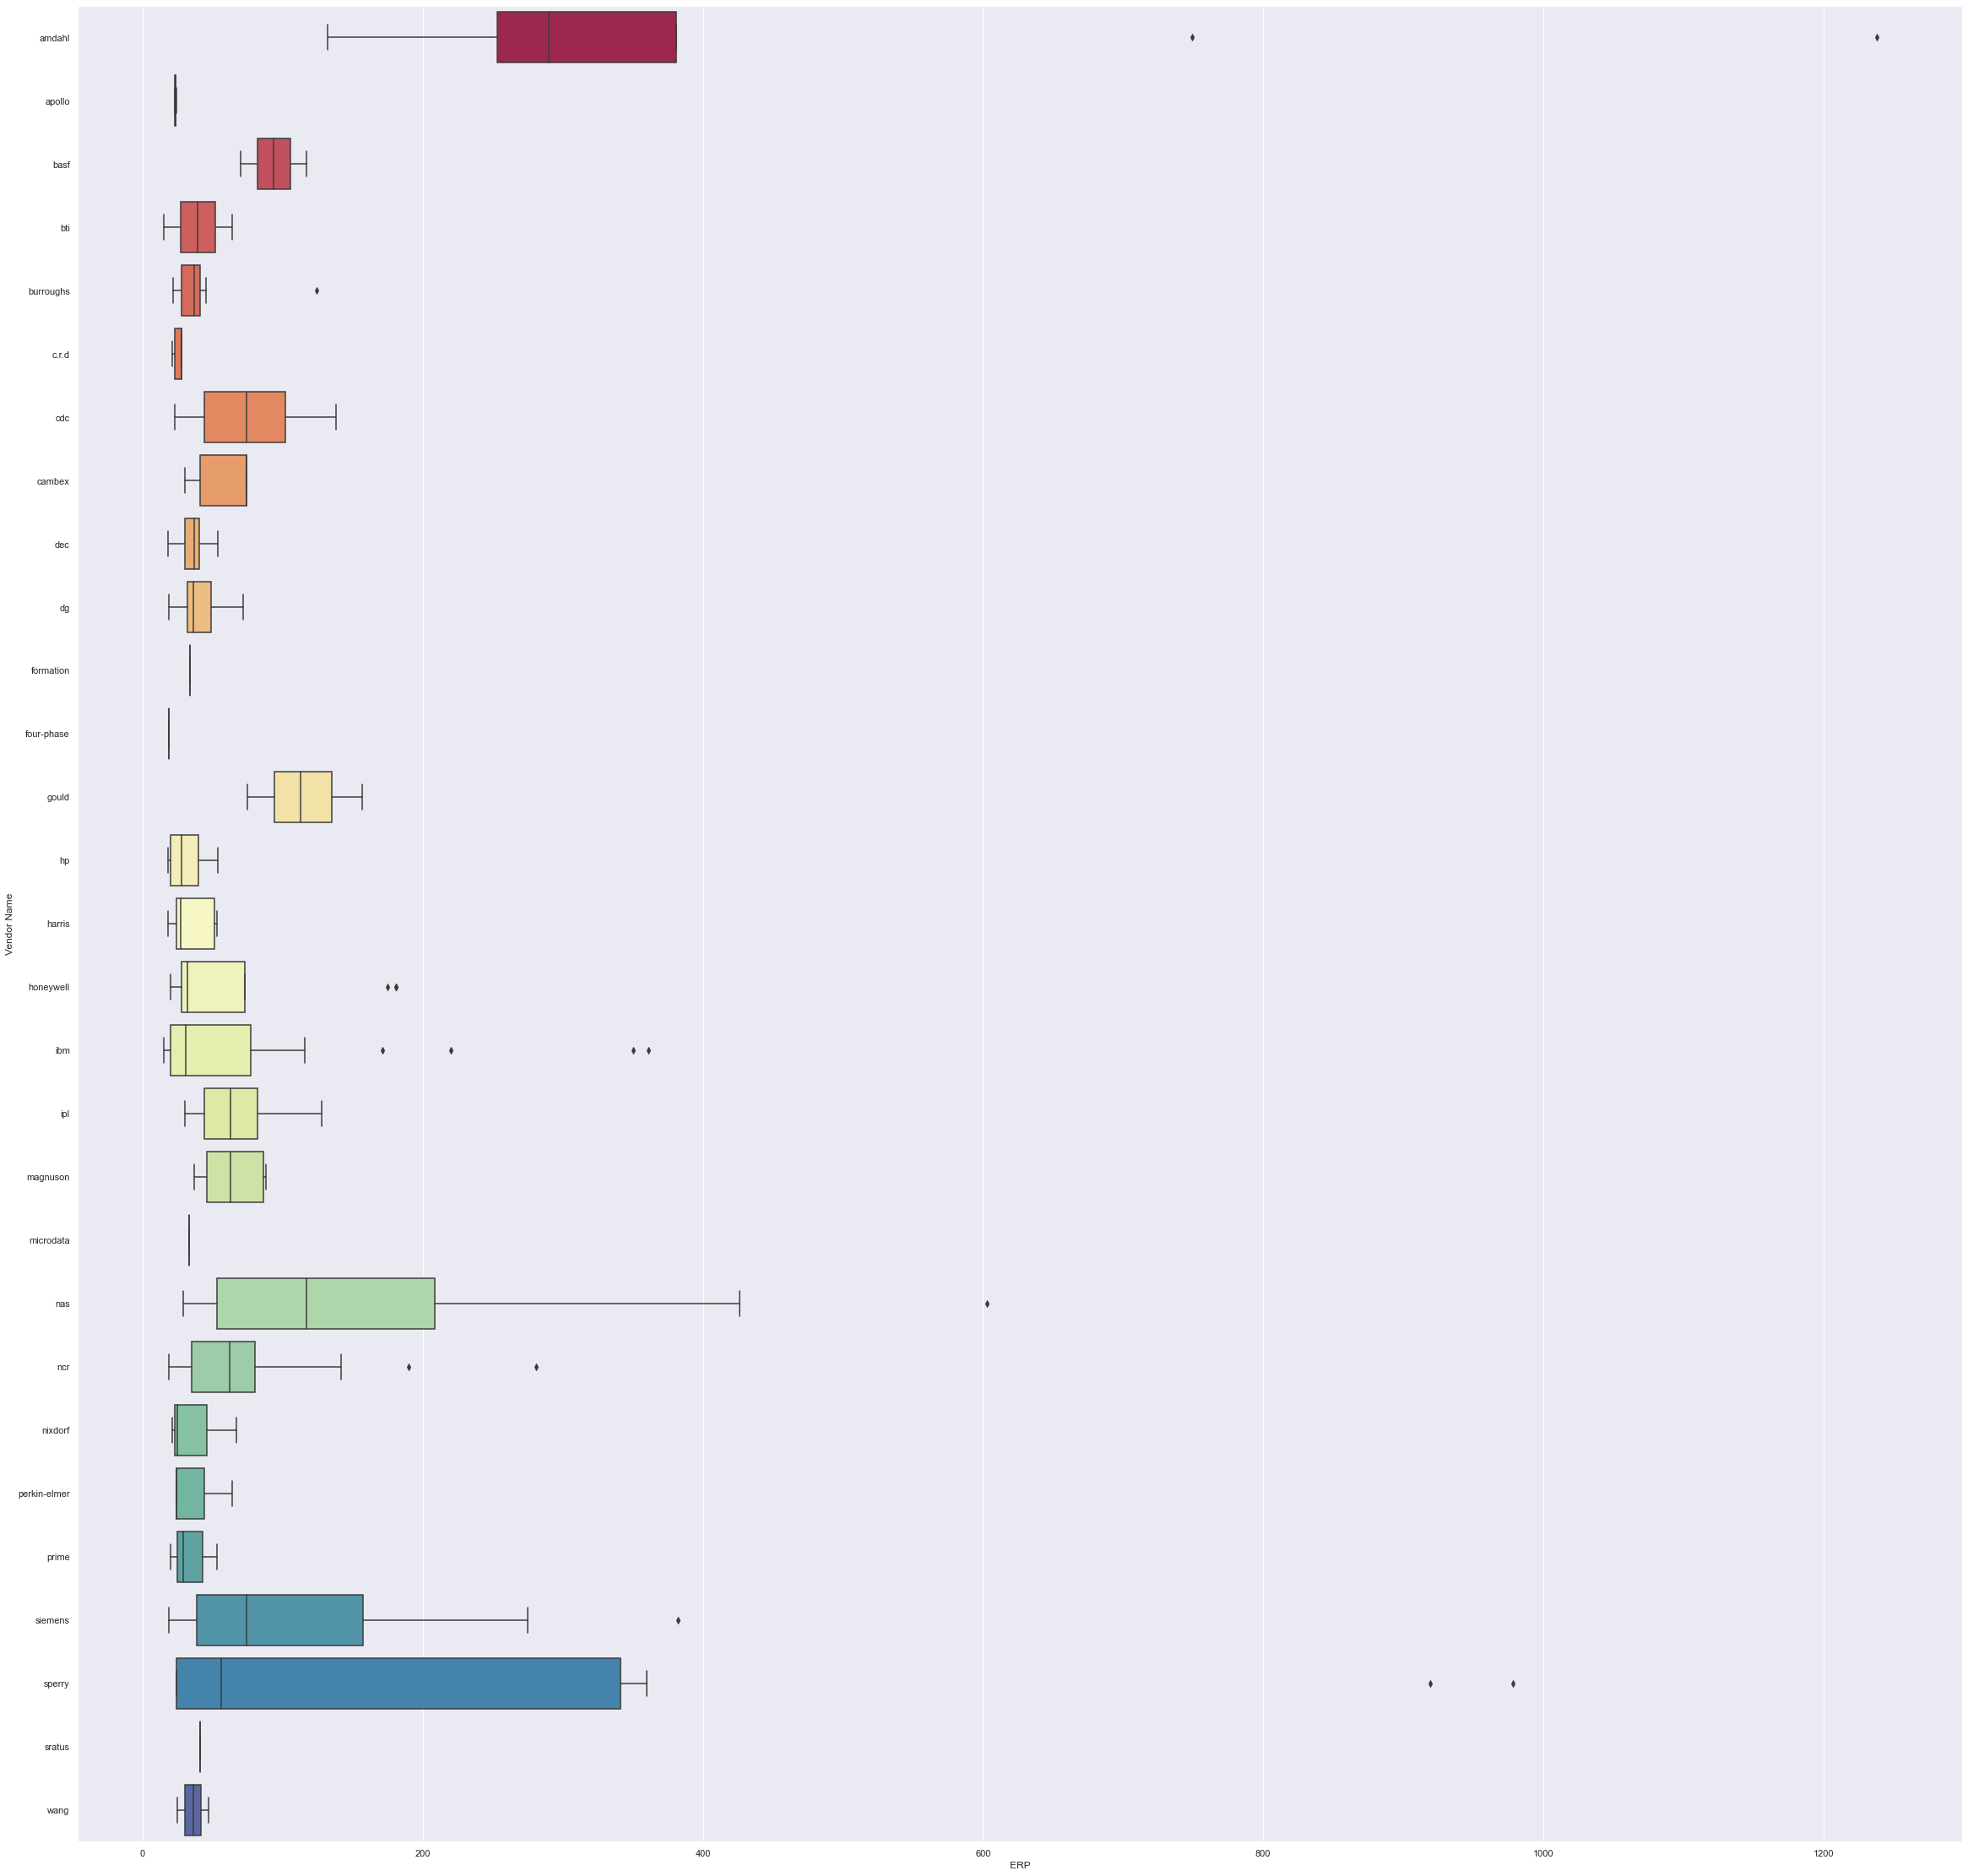

In [30]:
### Function to plot boxplot
plt.figure(figsize=(40,40))
sns.boxplot(data=df, x="ERP",y=df['Vendor Name'],palette="Spectral")
plt.show()

#### Analysis on Vendor Name

This plot gives a nice visualization of the different ranges and outliers per vendorname.

## Box Plots for Dropped Data

### MYCT

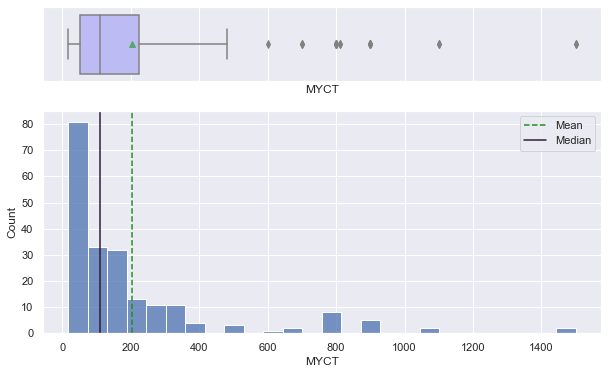

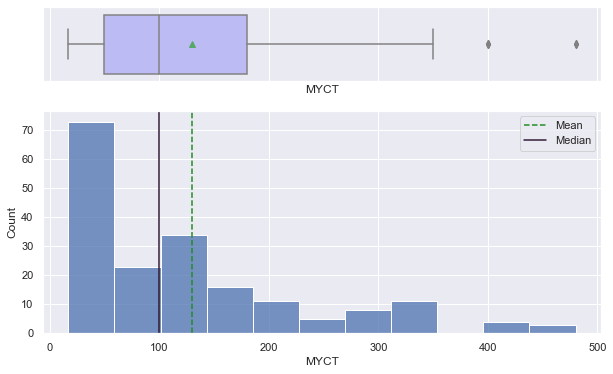

In [31]:
draw_boxplot_histogram(df, "MYCT")
draw_boxplot_histogram(df_clean_MYCT, "MYCT")

In [32]:
print(f"The number of outliers dropped is {outliers_MYCT[val].count()}")
print(f"The number of rows reamining is {df_clean_MYCT[val].count()}")

The number of outliers dropped is 20
The number of rows reamining is 188


#### Observations on MYCT with Drops

- Here we can see 20 data points are dropped but the mean and median became much more centralized, and the overall skew is reduced

### MMIN

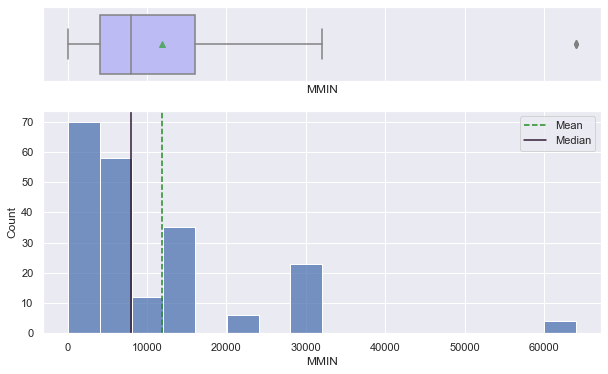

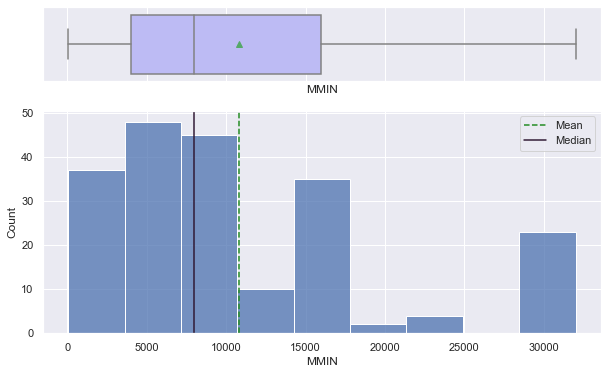

In [33]:
draw_boxplot_histogram(df, "MMIN")
draw_boxplot_histogram(df_clean_MMIN, "MMIN")

In [34]:
print(f"The number of outliers dropped is {outliers_MMIN[val].count()}")
print(f"The number of rows reamining is {df_clean_MMIN[val].count()}")

The number of outliers dropped is 4
The number of rows reamining is 204


#### Observations on MMIN with Drops

- Here we can see only 4 data points are dropped but the mean and median became much more centralized, and the overall skew is reduced

## Overall Observations on EDA

Based on our EDA we can see that there are a fair number of outliers in the data. For our final model analysis we decided to compare models with these outliers drop. Two columns that we used to determine what to drop are MYCT and MMIN. We picked boths of these for separate but strong reasons. 
- For `MYCT` we decided to drop from there because based on the EDA above it had the most amout of outliers. However, based on the heatmap it only has -0.26 to -0.38 correlation, which is only a moderate to weak correlation. Thus we pickd our second column to drop outlier rows from.
- For `MMIN` we decided to drop outliers form this one because it has in general the strongest correlations with the correlation ranging from 0.56 to 0.9, with is in general very strongly correlated to the other outliers.

It is important to note we did **not** drop using values from PRP (published relative performance) because we are ultimately attempting to compare PRP to ERP (estimated relative performance), and therefore we feel dropping from PRP would not be an appriopriate choice.

Also it important to note we decided to not include Vendor Name or Model Name into our final model. 
- For `Model Name` this is because there is exactly one model name of each data entry, it acts like a primary key or row identifier when analyzing the overall dataset, and therefore we believe it is not worth converting to a numerical value.
- For `Vendor Name`, the amount of caterogies is also very high, instead of training the model on it we decided to use it for a categorical analysis of our Multiple Linear Regression (MLR).
 

# Model Selection

Our linear regression will use `ERP` as the dependent variable. The ERP is a performance estimator which will be compared against the original published values (PRP). Independent variables are `MYCT`,`MMIN`,`MMAX`,`CACH`, `CHMIN`, and `CHMAX`. We will conduct a linear regression analysis to predict if there's a positive correlation between ERP and the independent variables.

# Model Analysis

In [35]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # additional plotting library

#MLR of ERP
x = df.iloc[:, [2,3,4,5,6,7,8]]
y = pd.DataFrame(df['ERP'])

#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=0)

#OLS multiple linear regression
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     673.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          7.55e-135
Time:                        02:16:00   Log-Likelihood:                -1005.8
No. Observations:                 207   AIC:                             2028.
Df Residuals:                     199   BIC:                             2054.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8281      4.775     -7.085      0.000     -43.244     -24.412
MYCT           0.0372      0.009      3.911      0.000       0.018       0.056
MMAX           0.0054      0.001      4.837      0.000       0.003       0.008
MMIN           0.0034      0.000      8.502      0.000       0.003       0.004
CACH           0.1015      0.089      1.136      0.257      -0.075       0.278
CHMIN         -0.0002      0.458     -0.001      1.000      -0.904       0.904
CHMAX          0.3162      0.136      2.325      0.021       0.048       0.584
PRP            0.5815      0.038     15.278      0.000       0.506       0.657
==============================================================================
Omnibus:                       46.845   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.288
Skew:                           0.457   Prob(JB):                    8.28e-100
Kurtosis:                      10.216   Cond. No.                     3.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we are using the Ordinary Least Squares (OLS) regression model. From the results we can see that R-squared has a value of 0.960 and adjusted R-squared a value of 0.958. This indicates that the relationship between the independent variables and the dependent variable is 95.8% accurate as shown with our regression model.

In [36]:
from sklearn import linear_model

class SimpleLinearRegressionModel:
    def __init__(self, input_values, x_axis_label, output_values):
        # Initialize and fit the linear regression model
        linear_regression = linear_model.LinearRegression()
        fitted_model = linear_regression.fit(input_values, output_values)
        predictions = fitted_model.predict(input_values)

        # Evaluate the performance of the model
        coefficient_of_determination = fitted_model.score(input_values, output_values)
        
        # Set up the plotting style and create a plot
        plt.style.use(['default', 'ggplot'])
        figure, axis = plt.subplots(figsize=(8, 4))

        # Plot the regression line and the sample data
        axis.plot(input_values, predictions, color='black', label='Regression Model')
        axis.scatter(input_values, output_values, edgecolor='black', facecolor='grey', alpha=0.7, label='Sample Data')
        
        # Labeling and titling the plot
        axis.set_ylabel('ERP', fontsize=14)
        axis.set_xlabel(x_axis_label, fontsize=14)
        axis.text(0.8, 0.1, f'R^2: {coefficient_of_determination:.2f}', fontsize=13, ha='center', va='center', transform=axis.transAxes, color='#2222BB', alpha=0.5)
        axis.legend(facecolor='white', fontsize=11)
        axis.set_title(f'Regression Model: {x_axis_label}', fontsize=18)

        # Adjust the layout and display the plot
        figure.tight_layout()
        plt.show()

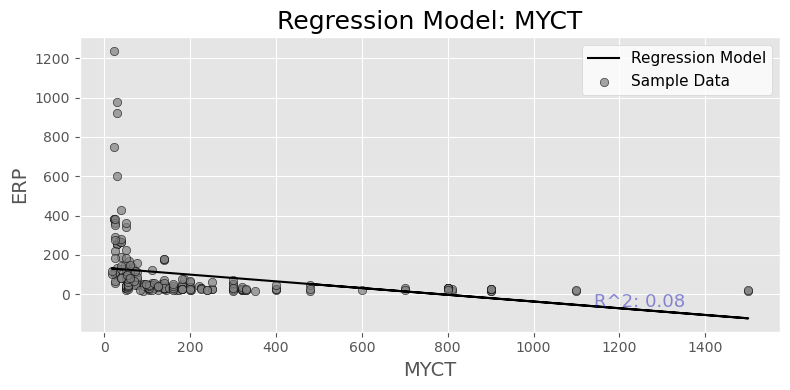

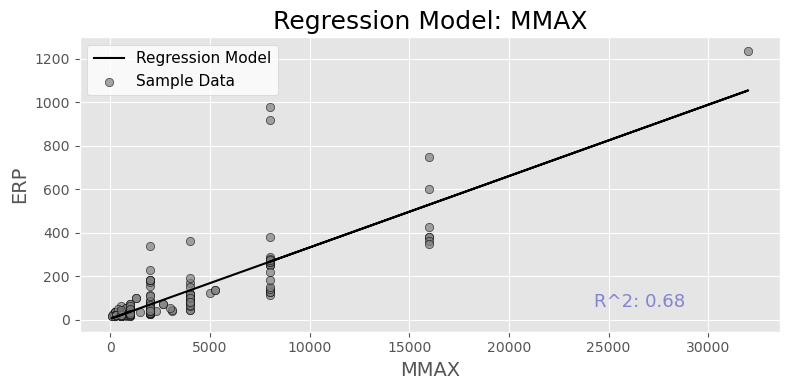

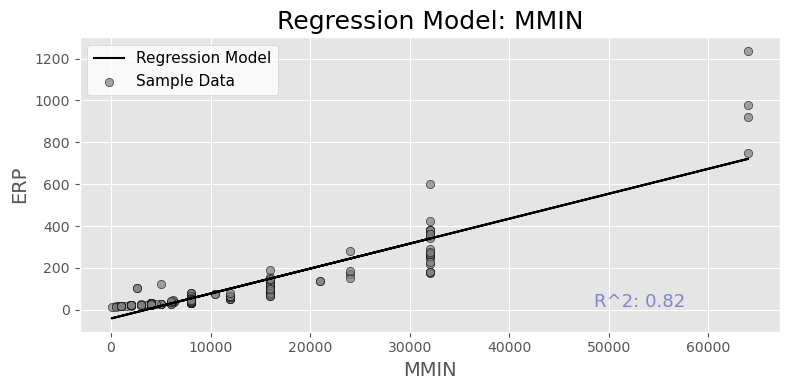

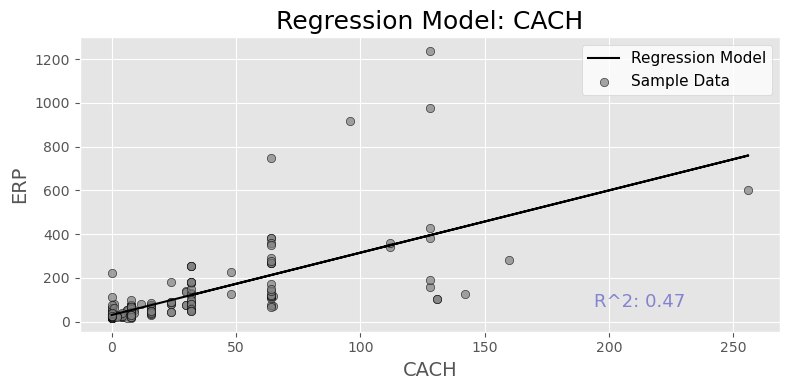

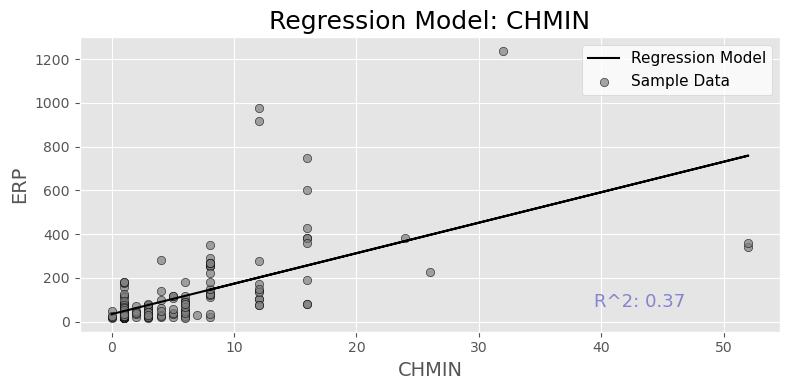

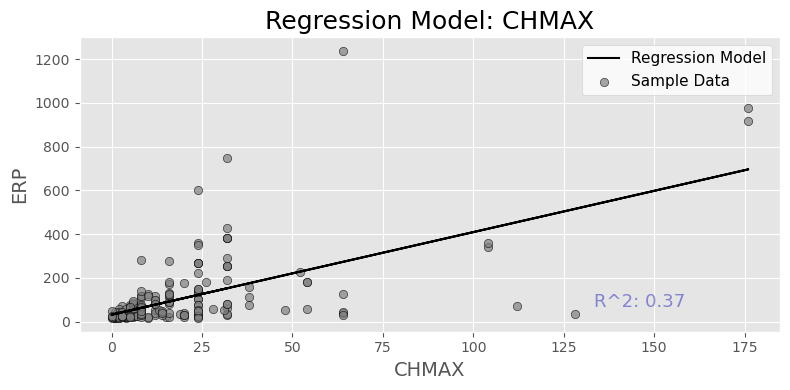

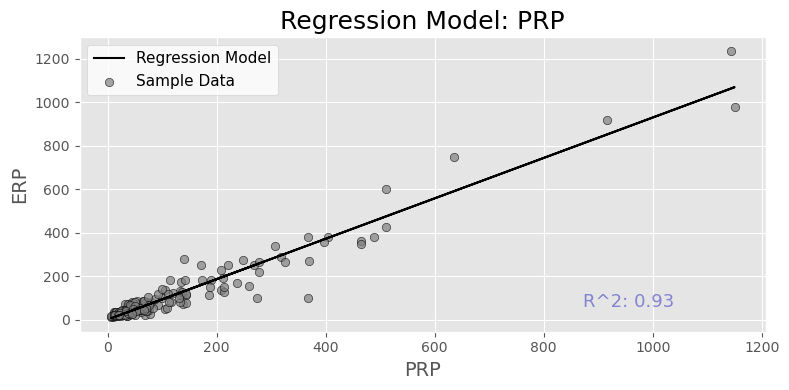

In [37]:
#Iterate through all of our columns except Vendor Name and Model Name
for col in df:
    if(col != "ERP" and col != "Vendor Name" and col != "Model Name"):
        x = df.iloc[:, [df.columns.get_loc(col)]].values.reshape(-1,1)
        xlabel = col
        y = df['ERP'].values
        graph = SimpleLinearRegressionModel(x, xlabel, y)

### Alternative Multiple Linear Regression Analysis

This is an alternate method for multiple linear regression analysis. 

Instead of finding a single regression for all the variables each model is categorized by Vendor Name, and a regression line is made for each. 

Note the deviations of PRP and ERP on certain vendors.

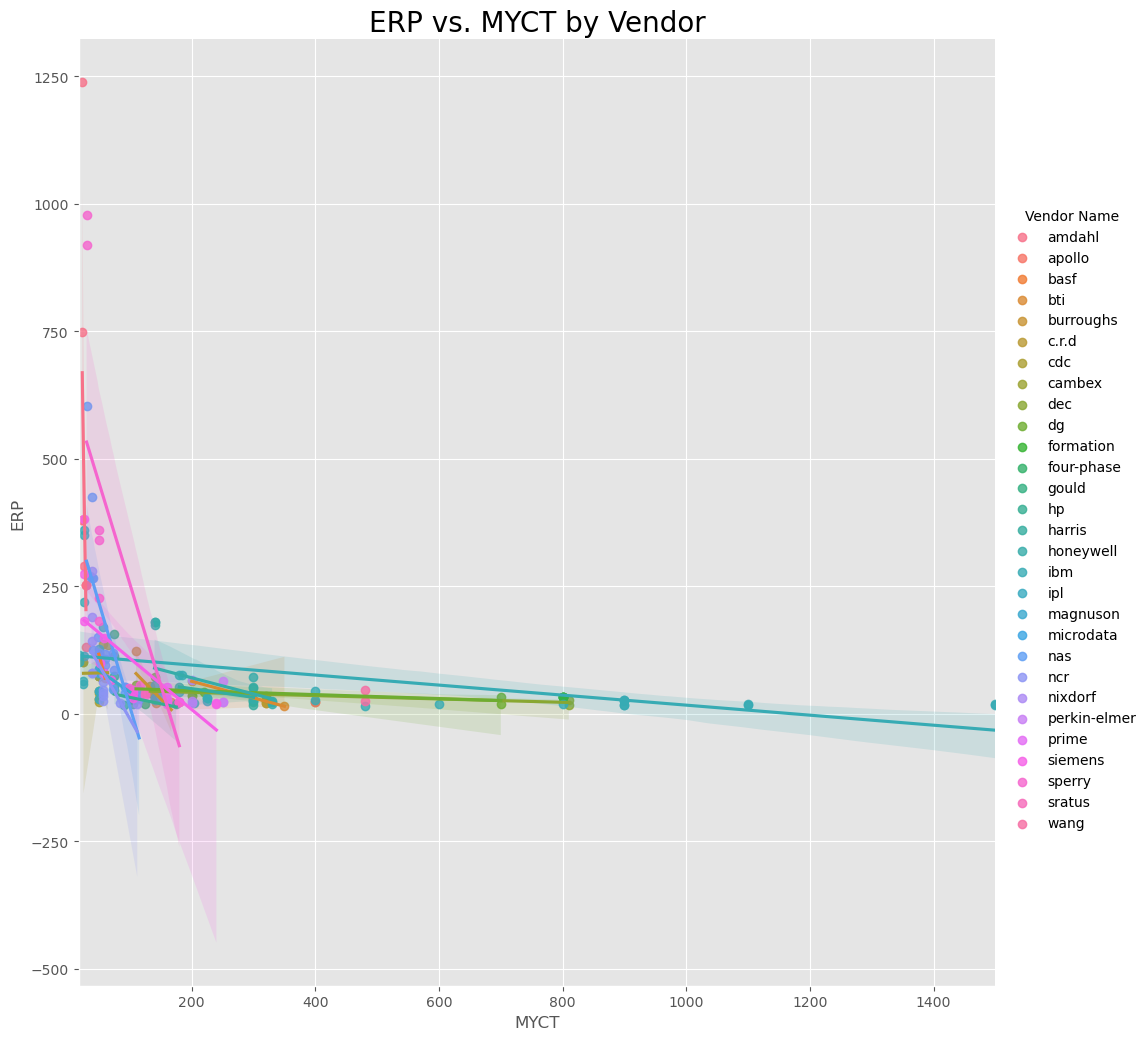

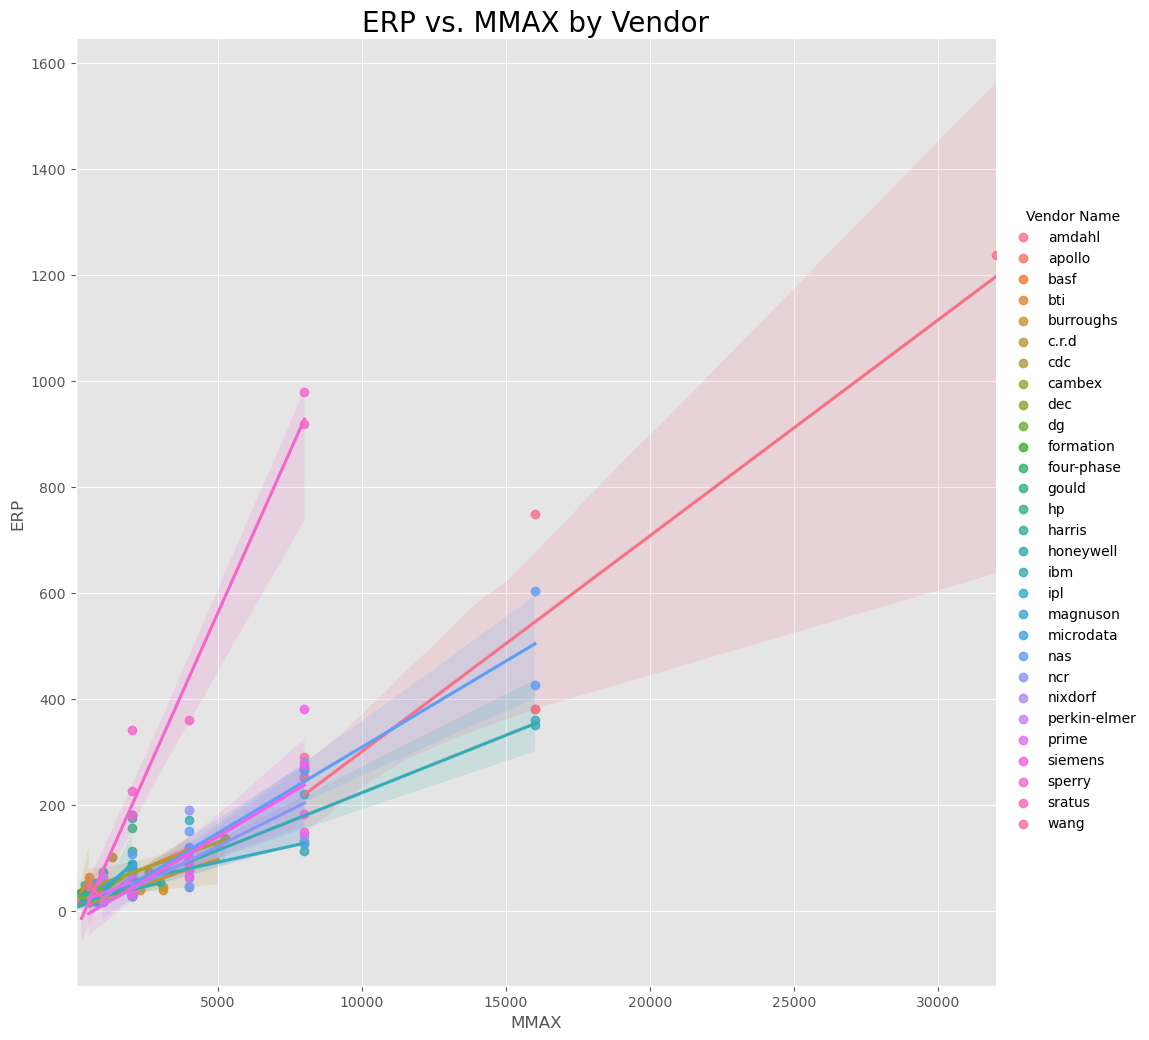

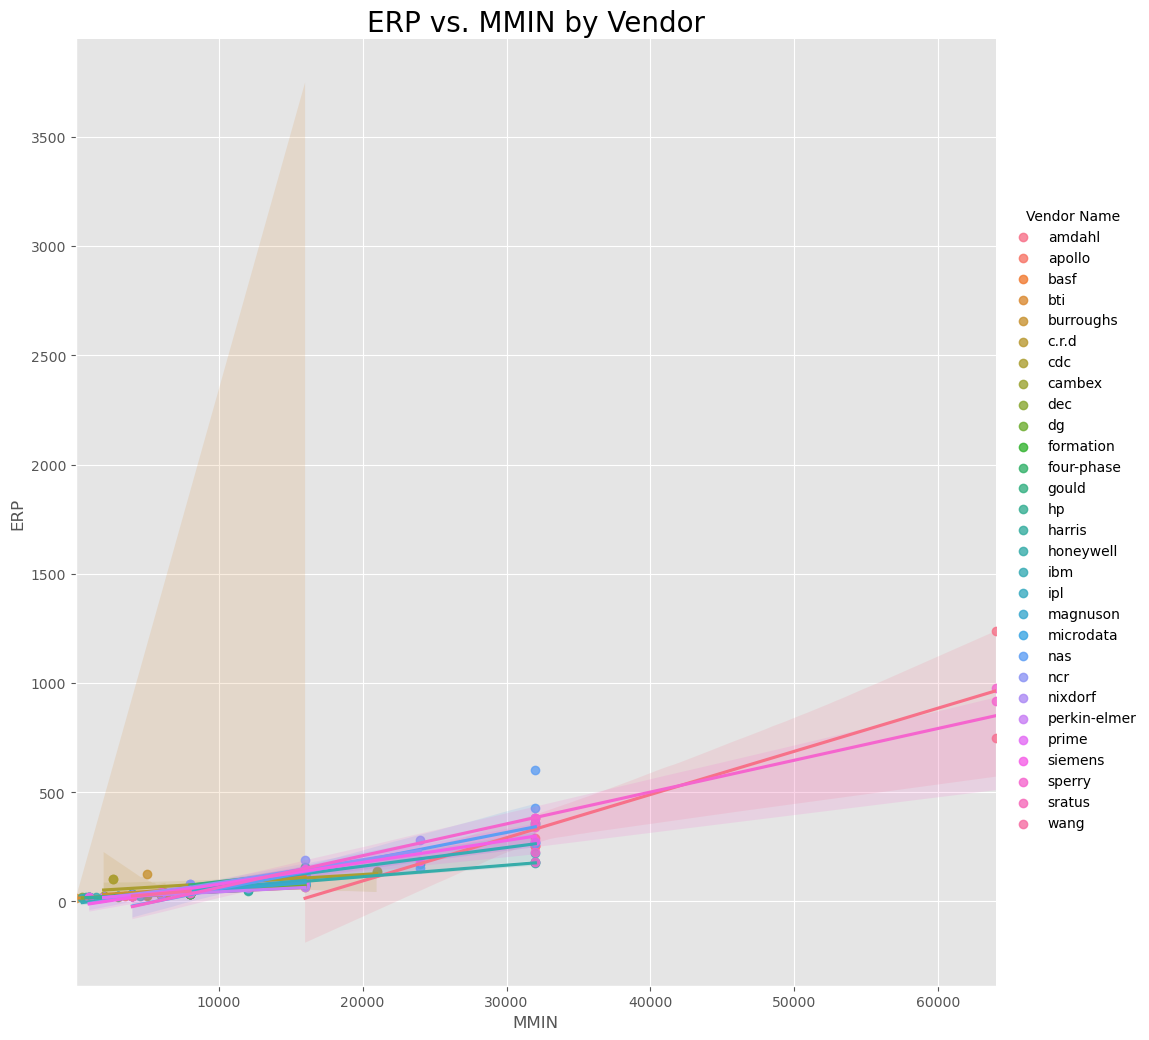

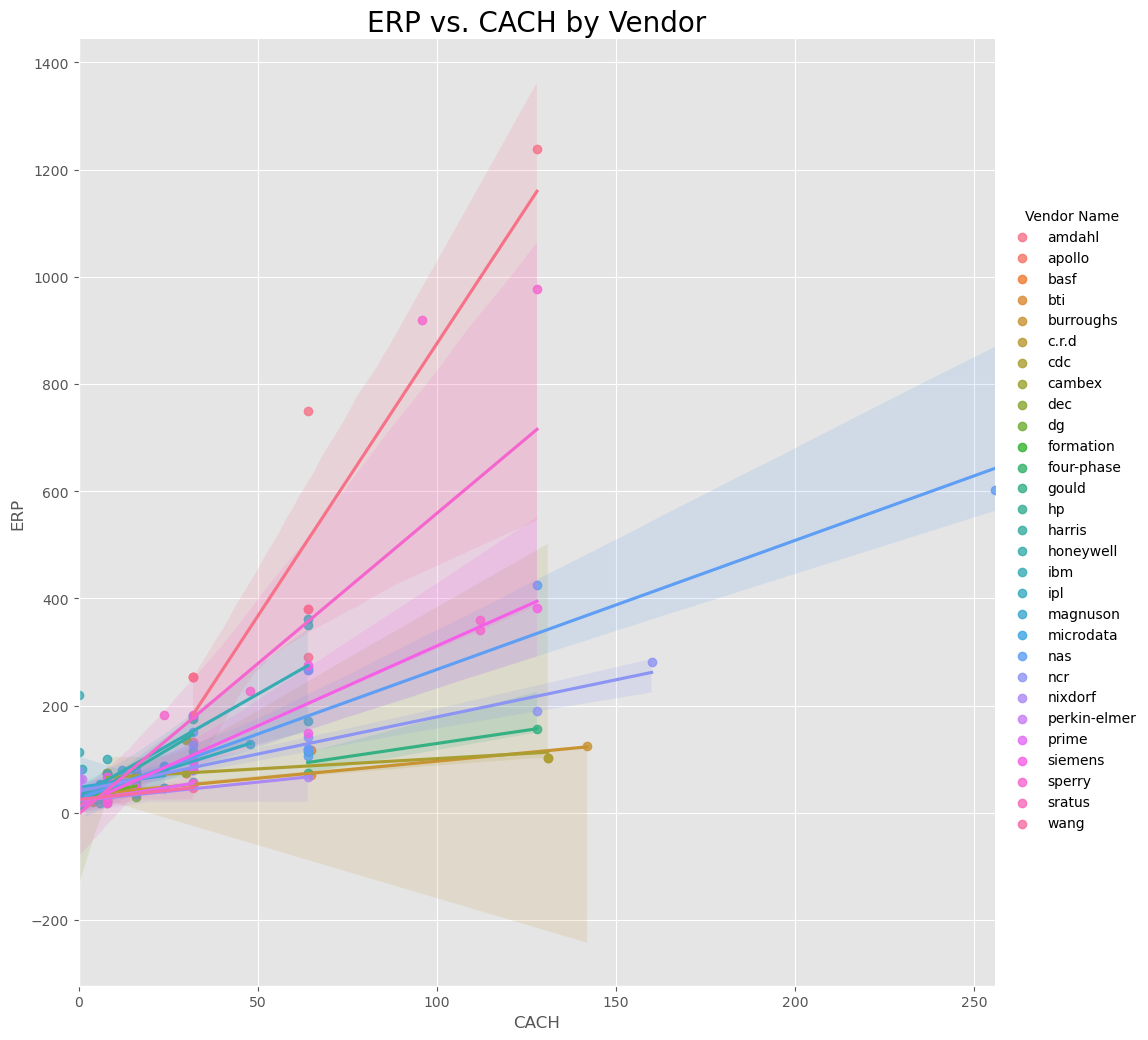

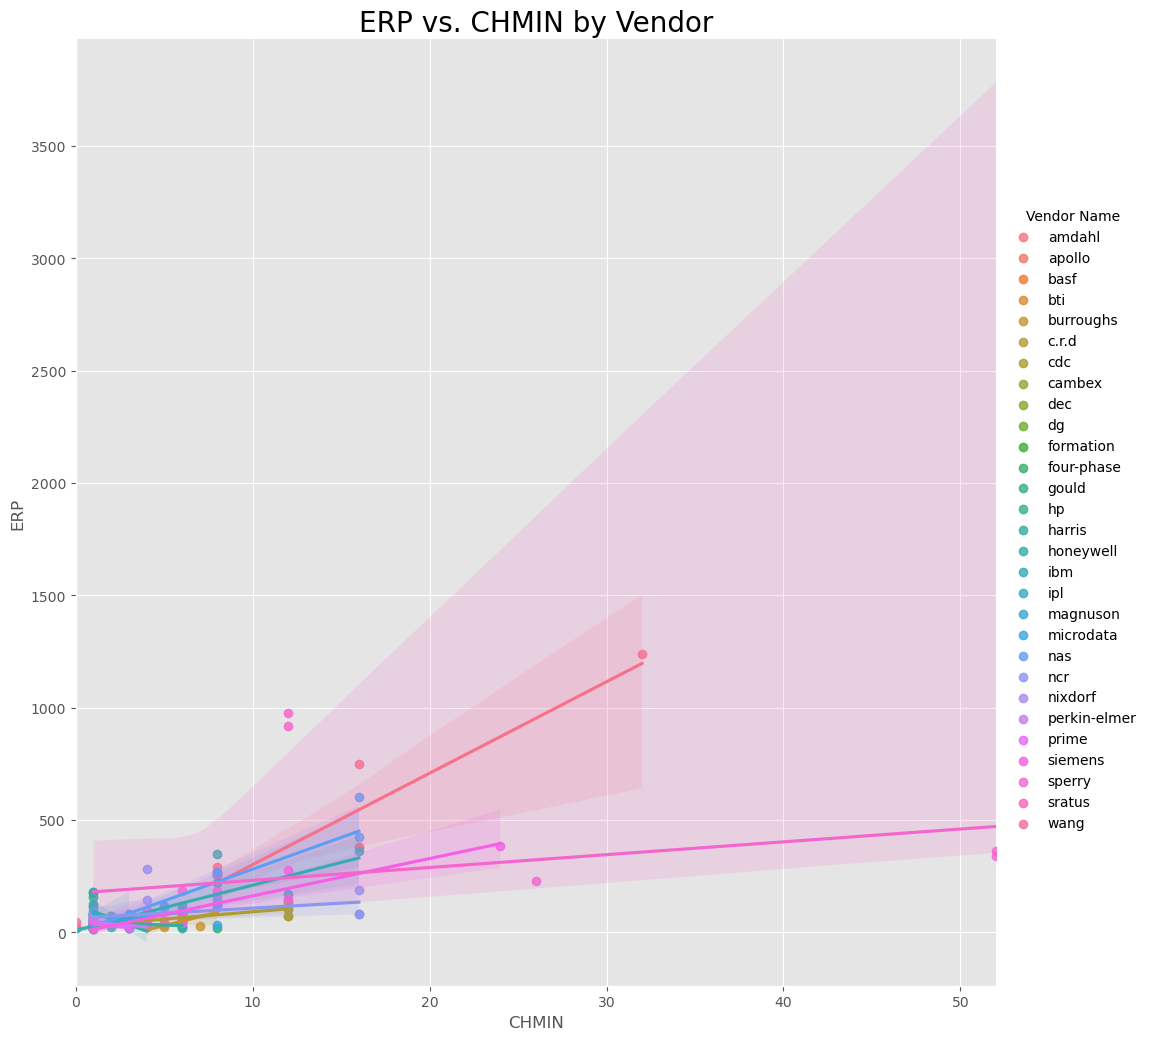

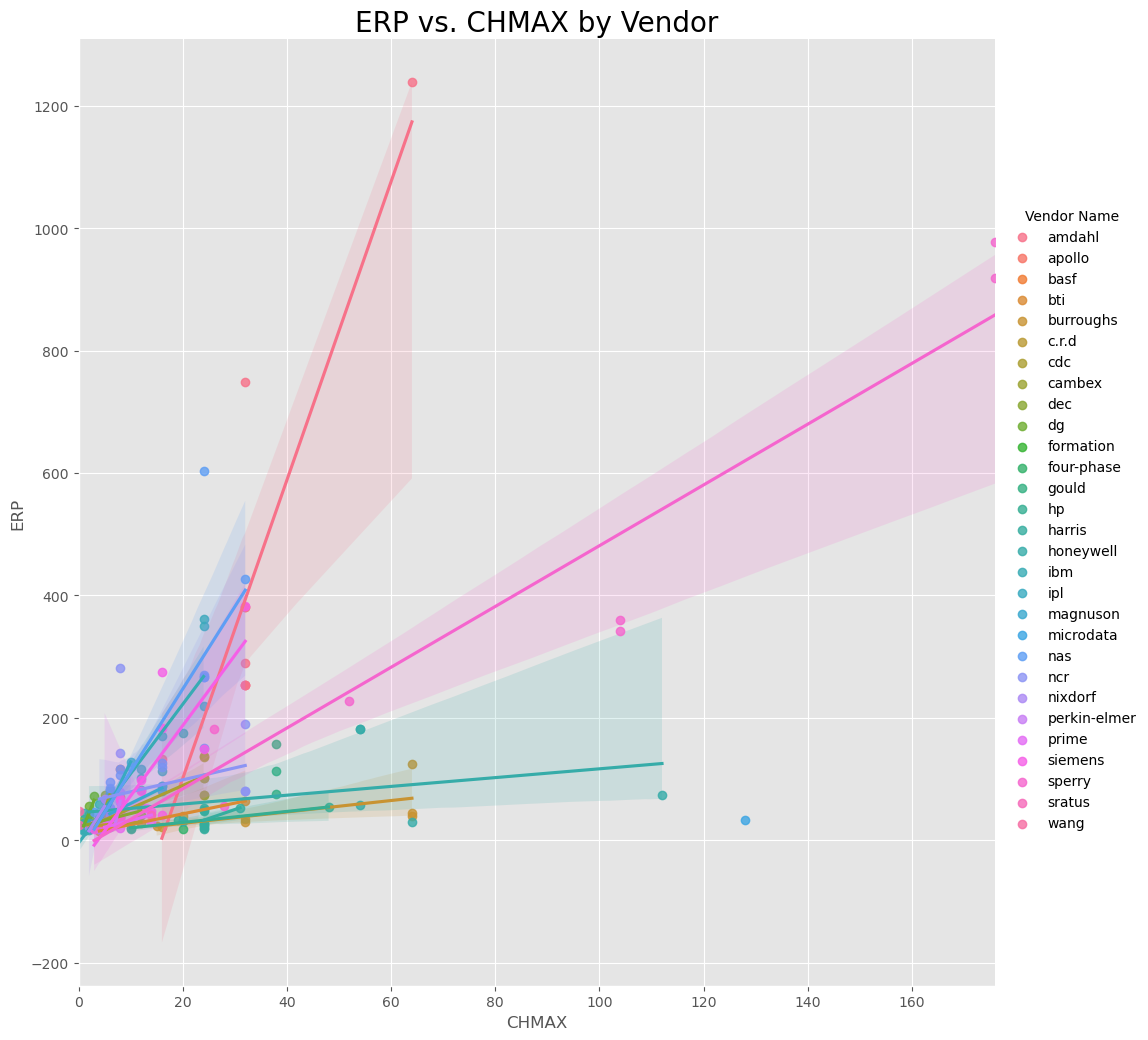

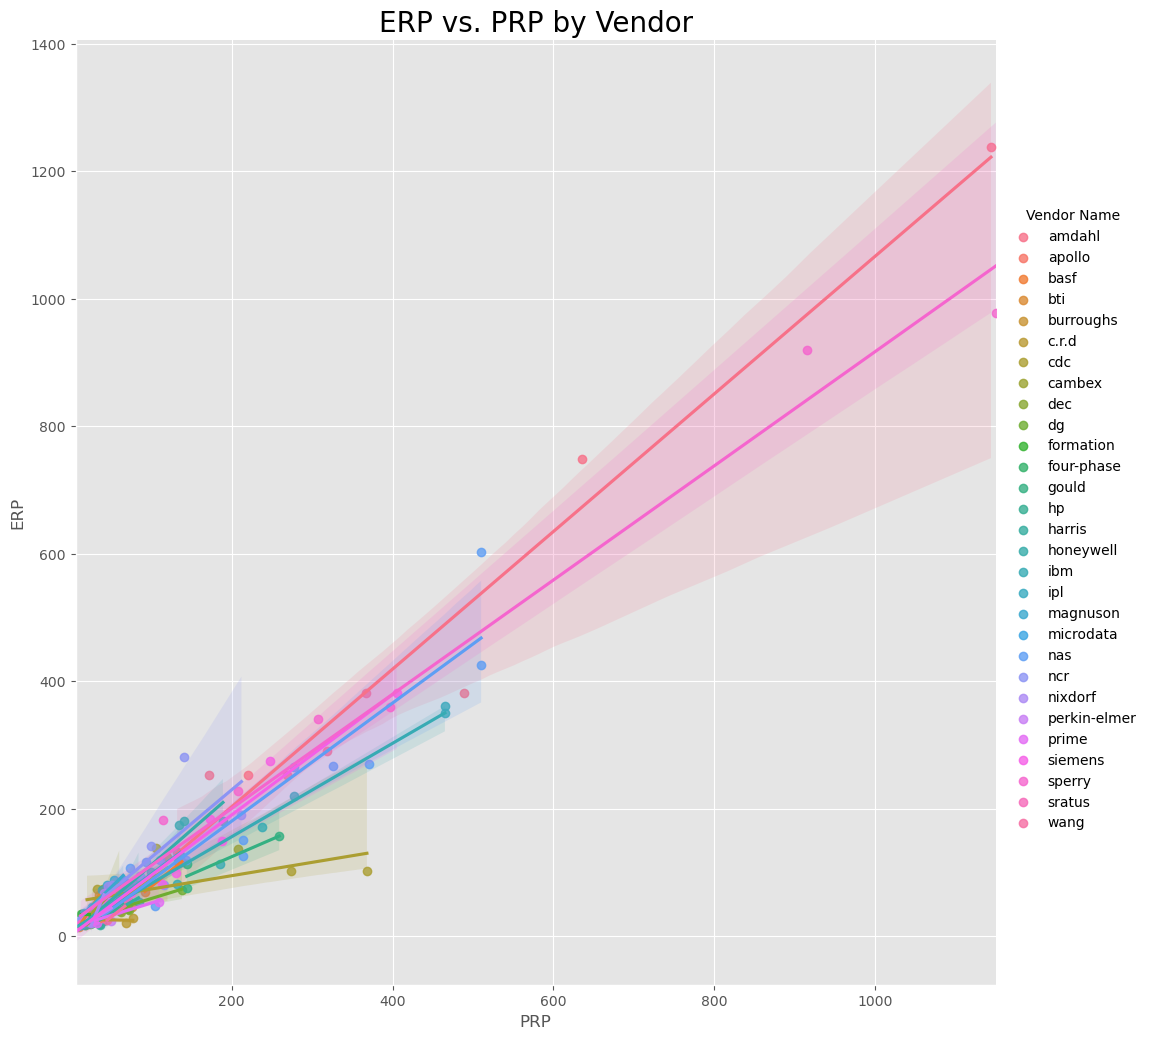

In [38]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Plot MLR graphs
for col in df:
    if(col != "ERP" and col != "Vendor Name" and col != "Model Name"):
        plot = sns.lmplot(
                data=df,
                x=col, y="ERP",
                hue="Vendor Name",
                height=10
        )
        
        # Adding a title based on the column name
        plt.title(f'ERP vs. {col} by Vendor', fontsize=20)

## Model Optimization

Below we decided to see how the model would perform if we dropped outliers. As explained in EDA we decided to drop outliers that were above Q3 from MYCT and MMIN due to sheer number and correlation respectively.

### How the Model Performs with MYCT Outliers Dropped

In [39]:
#MLR of ERP
x = df_clean_MYCT.iloc[:, [2,3,4,5,6,7,8]]
y = pd.DataFrame(df_clean_MYCT['ERP'])

#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=0)

#OLS multiple linear regression
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     606.9
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          4.34e-121
Time:                        02:16:29   Log-Likelihood:                -915.65
No. Observations:                 187   AIC:                             1847.
Df Residuals:                     179   BIC:                             1873.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.2412      6.695     -6.458      0.000     -56.453     -30.029
MYCT           0.0882      0.027      3.231      0.001       0.034       0.142
MMAX           0.0058      0.001      4.889      0.000       0.003       0.008
MMIN           0.0036      0.000      8.283      0.000       0.003       0.004
CACH           0.1274      0.094      1.359      0.176      -0.058       0.312
CHMIN          0.1044      0.478      0.218      0.827      -0.839       1.048
CHMAX          0.3083      0.142      2.168      0.032       0.028       0.589
PRP            0.5696      0.040     14.208      0.000       0.490       0.649
==============================================================================
Omnibus:                       35.920   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.091
Skew:                           0.409   Prob(JB):                     6.02e-54
Kurtosis:                       8.549   Cond. No.                     4.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How the Model Performs with MMIN Outliers Dropped

In [40]:
#MLR of ERP
x = df_clean_MMIN.iloc[:, [2,3,4,5,6,7,8]]
y = pd.DataFrame(df_clean_MMIN['ERP'])

#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=0)

#OLS multiple linear regression
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     866.9
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          3.37e-143
Time:                        02:16:29   Log-Likelihood:                -855.34
No. Observations:                 203   AIC:                             1727.
Df Residuals:                     195   BIC:                             1753.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.1938      2.577     -8.224      0.000     -26.276     -16.111
MYCT           0.0258      0.005      5.152      0.000       0.016       0.036
MMAX           0.0081      0.001     11.282      0.000       0.007       0.010
MMIN           0.0040      0.000     17.968      0.000       0.004       0.004
CACH           0.6068      0.052     11.717      0.000       0.505       0.709
CHMIN          1.6970      0.275      6.160      0.000       1.154       2.240
CHMAX          0.0111      0.078      0.142      0.887      -0.143       0.165
PRP            0.1311      0.031      4.221      0.000       0.070       0.192
==============================================================================
Omnibus:                       86.023   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.397
Skew:                           1.208   Prob(JB):                    8.43e-244
Kurtosis:                      14.248   Cond. No.                     3.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Analysis on Model Optimization and Final Model Selection

Surpsingly dropping the 20 outliers as suggested by `MYCT` *did not* improve the $R^2_{adjusted}$ which stayed consistent at 0.958 for both. However the 4 outliers dropped in `MMIN` *did* improve the model, with the $R^2_{adjusted}$ increasing to 0.968. 

To resummarize what this means adjusted R-squared is used to assess the goodness of fit of a regression model while penalizing the inclusion of unnecessary predictors. It takes into account the number of independent variables in the model. The closer $R^2_{adjusted}$ is to 1 the better the model, especially in models with many independent variables like this one. Thus we recommend using our final model with the `MMIN` outliers dropped for all future analysis, assuming of course new data points are not outliers themselves. If they are the original model may prove best.

# Conclusion and Recommendations

We observe a positive correlation between of the variables MMIN, MMAX, CACH, CHMIN, and CHMAX with ERP, except MYCT which has a negative correlation with ERP. PRP tracks with ERP positively, note that some CPU models are faster or slower than the ERP.

Ultimaley our model has a $R^2_{adjusted}$ of **0.958** and after dropping the 4 highest outliers from MMIN we were able to achieve an a $R^2_{adjusted}$ of **0.968**. This indicates an exceptionally strong fit to the data, explaining approximately 96.8% of the variance in the dependent variable. This high adjusted R-squared value suggests that the independent variables included in the model are highly effective in explaining the variation observed in the dependent variable, and thus we recommend this model for future analysis, unless additional data is more consistent with the removed outliers.


Finally it is important to note, CPU architecture has significantly changed since 1987. With new fabrication technlolgy chipmakers have decreased semiconductor channel length from 200-300nm to 3-4nm along with multi-core systems that can handle multi-threaded processes. If we were to conduct this experiment again using modern hardware we can add some additional benchmarks such as clock rate, core count, single-threaded and multi-threaded processing times.


# Refences

Ein-Dor, P., & Feldmesser, J. (1987). Attributes of the performance of central processing units: A relative performance prediction model. Communications of the ACM, 30(4), 308-317. https://doi.org/10.1145/32232.32234


Waskom, M. (2023). Seaborn: Statistical data visualization (v0.13.0). Retrieved from https://seaborn.pydata.org/


Training data from: https://archive.ics.uci.edu/dataset/29/computer+hardware


## Machine.Name Files (Via the UCI Repository)


1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the authors
      using a linear regression method.  See their article (pp 308-313) for
      more details on how the relative performance values were set.

5. Number of Instances: 209 

6. Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
                             1 goal field, and the linear regression's guess)

7. Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

8. Missing Attribute Values: None

9. Class Distribution: the class value (PRP) is continuously valued.
   PRP Value Range:   Number of Instances in Range:
   0-20               31
   21-100             121
   101-200            27
   201-300            13
   301-400            7
   401-500            4
   501-600            2
   above 600          4

Summary Statistics:
	   Min  Max   Mean    SD      PRP Correlation
-   MCYT:   17   1500  203.8   260.3   -0.3071
-   MMIN:   64   32000 2868.0  3878.7   0.7949
-   MMAX:   64   64000 11796.1 11726.6  0.8630
-   CACH:   0    256   25.2    40.6     0.6626
-   CHMIN:  0    52    4.7     6.8      0.6089
-   CHMAX:  0    176   18.2    26.0     0.6052
-   PRP:    6    1150  105.6   160.8    1.0000
-   ERP:   15    1238  99.3    154.8    0.9665

